<h1 style="color:red; text-align:center"> PREDICTION DE CREDIT RISK </h1>

<h1 style="color:green">1. Introduction</h1>

<h2>Context</h2>

L'objectif principal est de créer un modèle qui classe le risque de crédit des personnes qui demandent un prêt auprès de la banque en fonction de l'âge de la personne, du revenu annuel, du type de propriété, de la durée de l'emploi dans l'année, de l'objet du prêt, de la qualité de prêt, le montant du prêt, le taux d'intérêt, le pourcentage du revenu annuel de la personne que représente ce prêt, si la personne a eu une surdité dans le passé, la durée de ses antécédents de crédit au cours de l'année.

<h2>Méthode de Machine Learning</h2>

- Nous mettrons à l'échelle les données pour meilleures performances.
- Avant de construire le modèle, nous utiliserons PCA (Analyse en composantes principales) pour la dimensensionnalité.
- Dans ce projet, nous utilisons la régression logistique.
  
<h2>Description des colonnes</h2>

- person_age : Âge du demandeur de prêt.
- person_income : Revenu annuel du demandeur de prêt.
- person_home_ownership : Statut de propriété du logement du demandeur (RENT, OWN, MORTGAGE).
- person_emp_length : Durée de l'emploi en années.
- loan_intent : Objet du prêt (PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT, DEBTCONSOLIDATION).
- loan_grade : Note du prêt (A, B, C, D, E, F).
- loan_amnt : Montant du prêt.
- loan_int_rate : Taux d'intérêt du prêt.
- loan_status : Statut du prêt (1 pour défaut, 0 pour non défaut).
- loan_percent_income : Pourcentage de revenu que représente le montant du prêt.
- cb_person_default_on_file : Si le demandeur a déjà fait défaut sur un prêt précédent (Y pour oui, N pour non).
- cb_person_cred_hist_length : Durée de l'historique de crédit du demandeur en années.

In [1]:
# Import les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # Permet de créer la palette de couleur
import seaborn as sns
sns.set(style="whitegrid")

# Import les bibliothèques pour la mise à l'échelle des données (scalling data) et PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Import les bibliothèques pour construire modèle
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras import backend as K
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
print(tf.__version__)

C:\Users\33766\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


2.16.1


<h1 style="color:green">2. Exploratory Data Analysis (EDA)</h1>

<h2>2.1 Introduction</h2>

In [2]:
df = pd.read_csv("Datasets/credit_risk_dataset.csv")
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [3]:
# Show the basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Le dataset contient 32 581 enregistrements et 12 colonnes. La plupart des colonnes sont entièrement remplies, mais quelques-unes présentent des valeurs manquantes :
- `person_emp_length` : 31 686 valeurs non-null sur 32 581 (2,74% de valeurs manquantes).
- `loan_int_rate` : 29 465 valeurs non-null sur 32 581 (9,56% valeurs manquantes).

**Check categorical variables (Object)**

In [4]:
# person_home_ownership
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [5]:
# loan_intent
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [6]:
# loan_grade
df['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [7]:
# cb_person_default_on_file
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

In [8]:
# loan_status
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

**Vérifier les statistiques de base**

In [9]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

**Vérifier si une valeur n'est pas un entier N/A**

In [10]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

**Vérifier si une valeur est dupliquée**

In [11]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [12]:
df.duplicated().sum()

165

**Valeurs Aberrantes (Outlier)**
- Les valeurs maximales pour `person_age` (144 ans) et `person_emp_length` (123 ans) sont probablement des erreurs de saisie.
- Les revenus très élevés (jusqu'à 6 000 000 dollars) pourraient être des valeurs aberrantes ou des cas spécifiques rares. 

**Valeurs Dupliquées**
- La présence de 165 enregistrements dupliqués indique qu'il serait nécessaire de nettoyer le dataset en supprimant des doublons pour éviter les biais dans l'analyse.

<h2>2.2 Nettoyage de données et Nouvelles fonctionnalités</h2>

In [13]:
# Drop N/A values
df.dropna(inplace = True)

In [14]:
# Drop repeat values
df.drop_duplicates(inplace= True)

In [15]:
# Drop loan_grade parce que la variable loan_grade ne fournit aucune information car nous n'avons pas de contexte à ce sujet
df.drop(['loan_grade'], axis = 1, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28501 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28501 non-null  int64  
 1   person_income               28501 non-null  int64  
 2   person_home_ownership       28501 non-null  object 
 3   person_emp_length           28501 non-null  float64
 4   loan_intent                 28501 non-null  object 
 5   loan_amnt                   28501 non-null  int64  
 6   loan_int_rate               28501 non-null  float64
 7   loan_status                 28501 non-null  int64  
 8   loan_percent_income         28501 non-null  float64
 9   cb_person_default_on_file   28501 non-null  object 
 10  cb_person_cred_hist_length  28501 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.6+ MB


In [17]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0    PERSONAL      35000          16.02            1                 0.59   
1   EDUCATION       1000          11.14            0                 0.10   
2     MEDICAL       5500          12.87            1                 0.57   
3     MEDICAL      35000          15.23            1                 0.53   
4     MEDICAL      35000          14.27            1                 0.55   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         Y                           3  
1                         N                           2  
2                         N                           3  
3                         N                           2  
4                         Y                           4

**Supprimer les valeurs aberrantes**

In [18]:
# Drop outliers in person_age
df = df[df['person_age'] < 90]
# Drop otliers in person_emp_lenght
df = df[df['person_emp_length'] < 60]

<h2>2.3 Les fonctionnalités discrètes et continues</h2>

In [19]:
# Divide features by discrete and continous (cela ne marche plus après PCA)

def divide_feature_types(data):
    col_cont = []
    col_dis = []
    for c in data.columns:
        if c in ['person_home_ownership', 'loan_intent', 'loan_status', 'cb_person_default_on_file']:
            col_dis.append(c)
        elif data[c].dtype == 'O':
            col_dis.append(c)
        else:
            col_cont.append(c)
    return col_cont, col_dis

col_cont, col_dis = divide_feature_types(df)
print('Continuous numerical features: ', col_cont)
print('Categorical or discrete features: ', col_dis)


Continuous numerical features:  ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
Categorical or discrete features:  ['person_home_ownership', 'loan_intent', 'loan_status', 'cb_person_default_on_file']


<h2>2.4 Analyse de la visualisation des données</h2>

**Créer un pairplot analysant les variables continues et les mettre en relation avec une variable discrète** 

C:\Users\33766\AppData\Local\Temp\ipykernel_24484\1759747278.py:15: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\33766\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\33766\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\33766\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

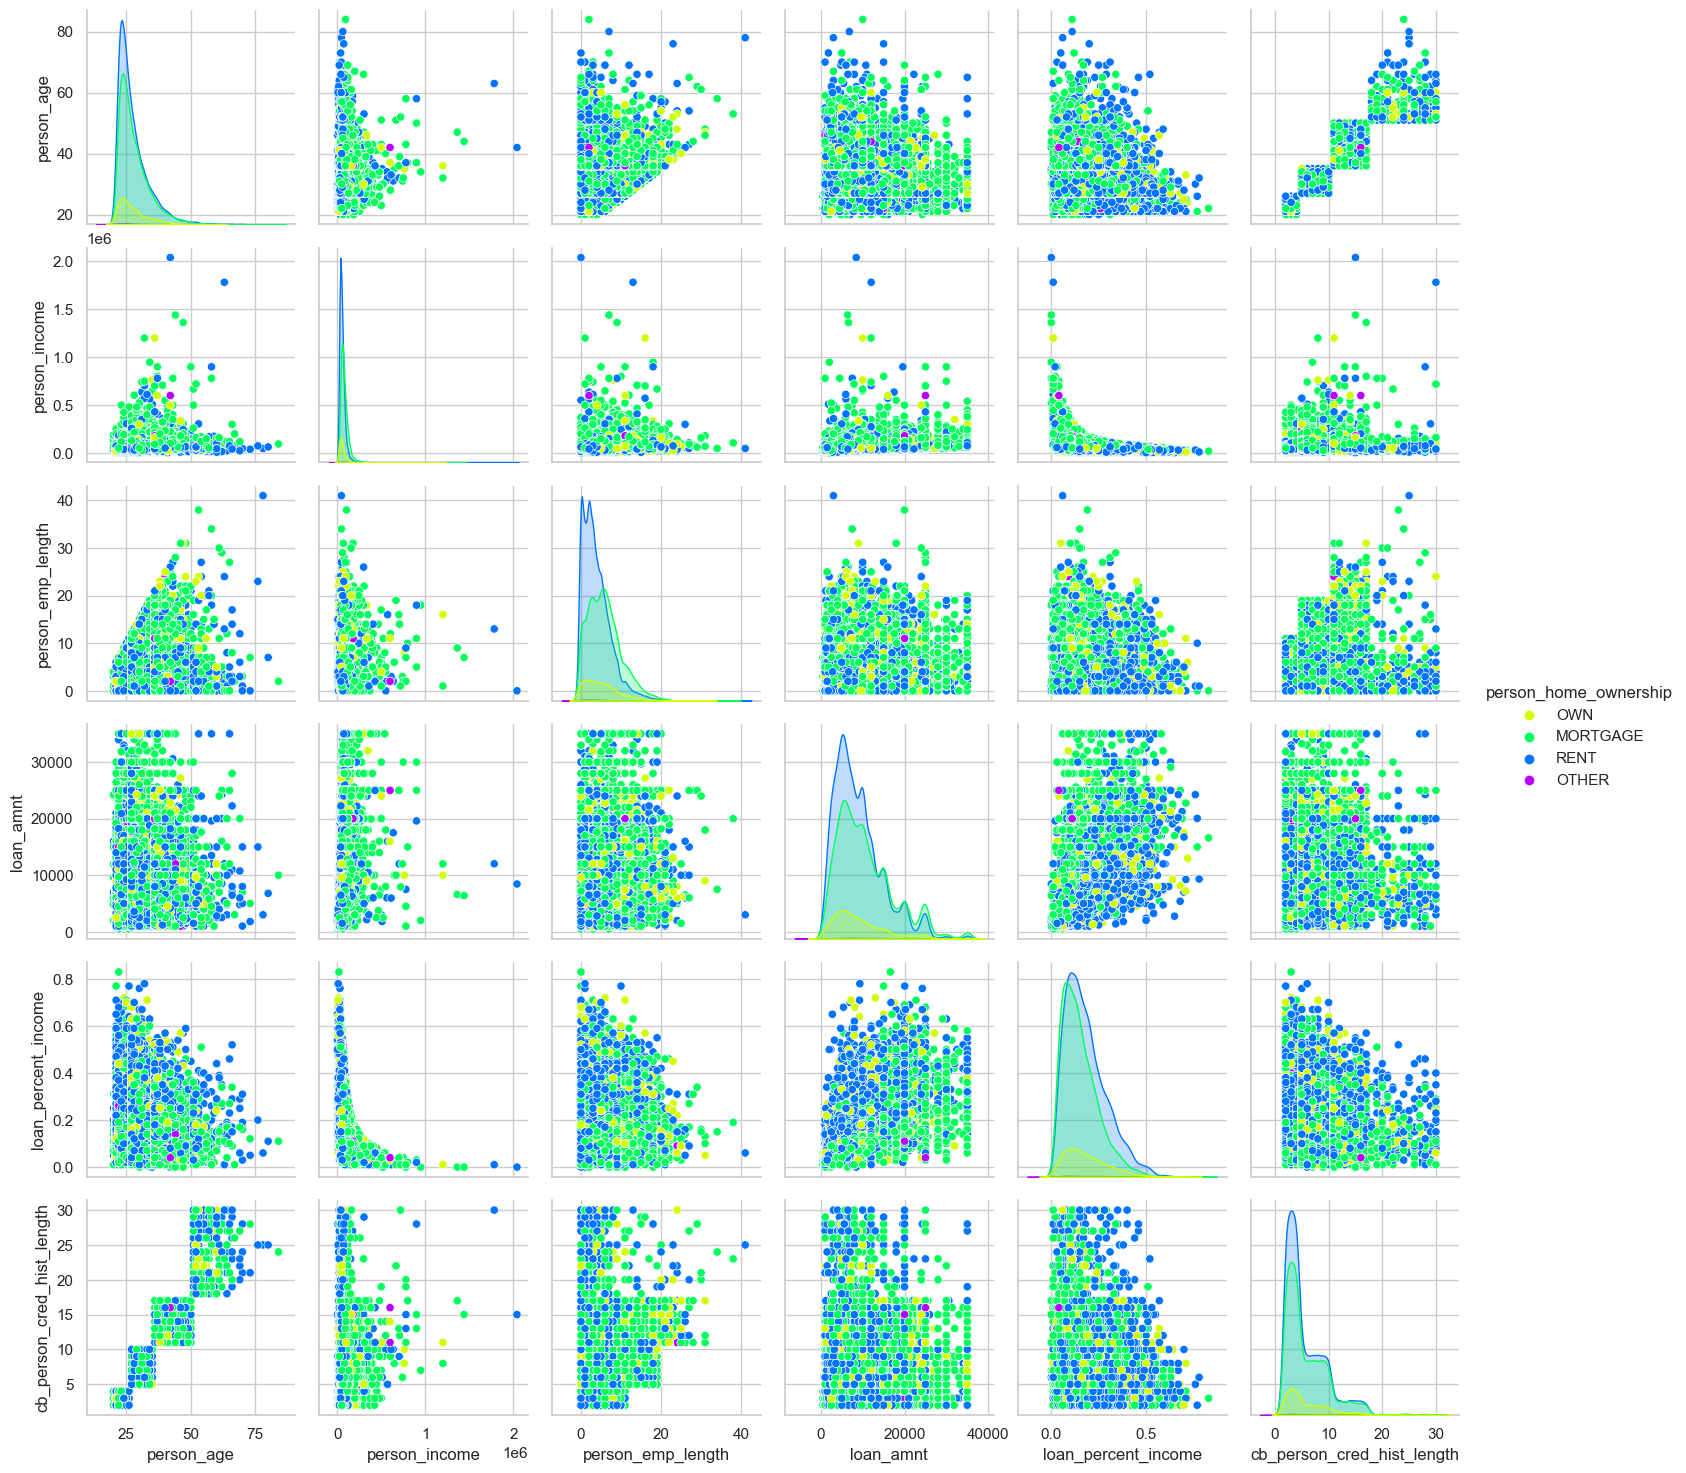

In [20]:
# Vérifier les catégories uniques dans 'person_home_ownership'
unique_categories = df['person_home_ownership'].unique()
num_categories = len(unique_categories)

# Définir une palette de couleurs avec suffisamment de couleurs pour chaque catégorie
palette = sns.color_palette("hsv", num_categories)

# Sélectionner les colonnes continues à tracer, excluant 'loan_int_rate'
col_cont_minus_loan_int_rate = [col for col in col_cont if col != 'loan_int_rate']

# Ajouter la variable discrète 'person_home_ownership' à la liste des colonnes à tracer
to_plot = col_cont_minus_loan_int_rate + ['person_home_ownership']

# Créer le pairplot
with pd.option_context('mode.use_inf_as_na', True):
    sns.pairplot(df[to_plot], hue='person_home_ownership', palette=palette)

# Afficher le plot
plt.show()

C:\Users\33766\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\33766\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\33766\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\33766\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

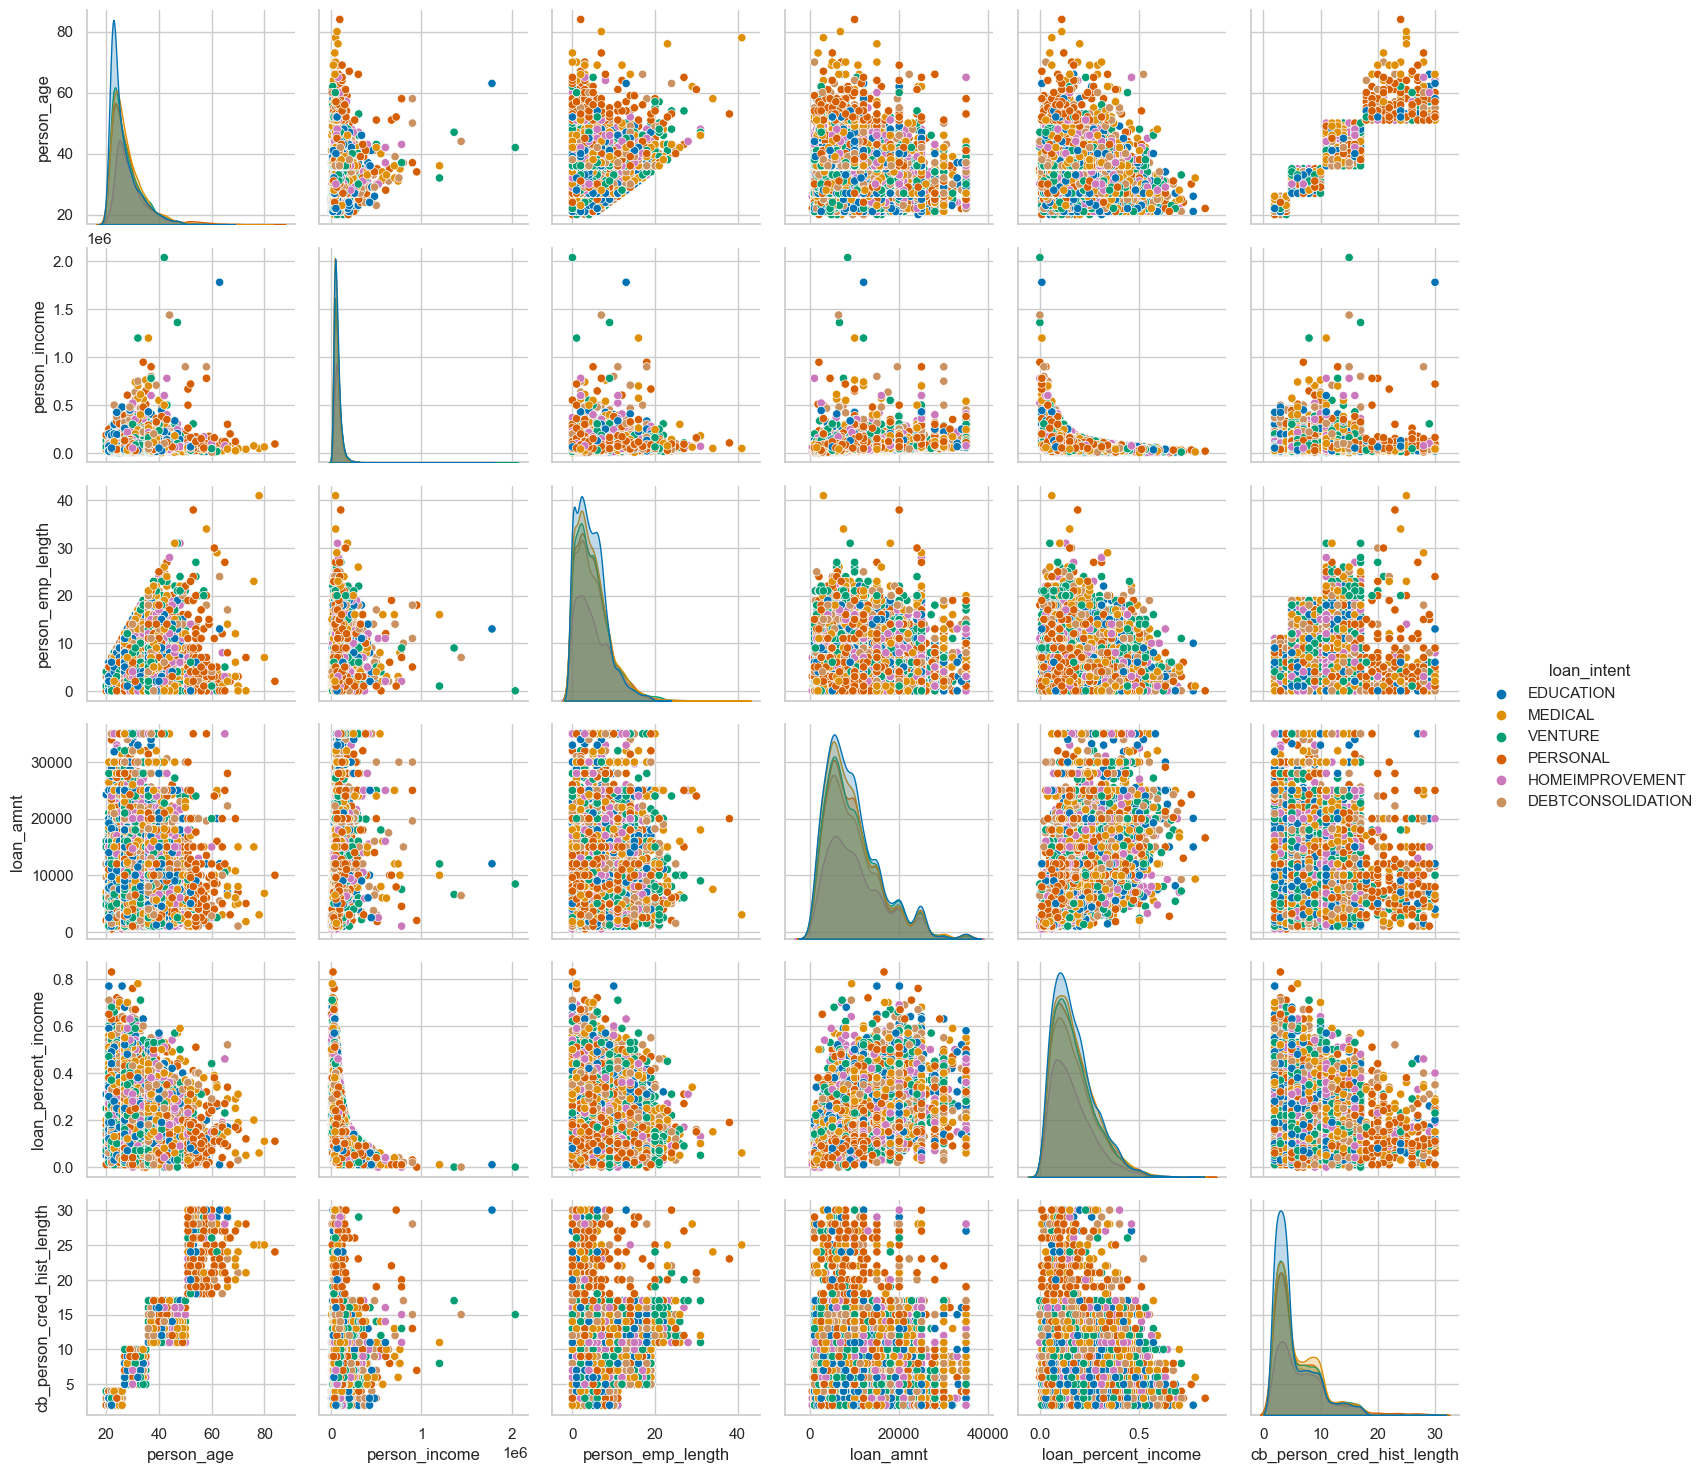

In [21]:
# créer un pairplot analysant les variables continues et les mettre en relation avec une variable discrète
# Sélectionner les colonnes continues à tracer, excluant 'loan_int_rate'
col_cont_minus_loan_int_rate = [col for col in col_cont if col != 'loan_int_rate']

# Ajouter la variable discrète 'loan_intent' à la liste des colonnes à tracer
to_plot = col_cont_minus_loan_int_rate + ['loan_intent']
sns.pairplot(df[to_plot], hue = 'loan_intent', palette= ('colorblind'))

# Afficher le plot
plt.show()

C:\Users\33766\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\33766\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\33766\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\33766\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

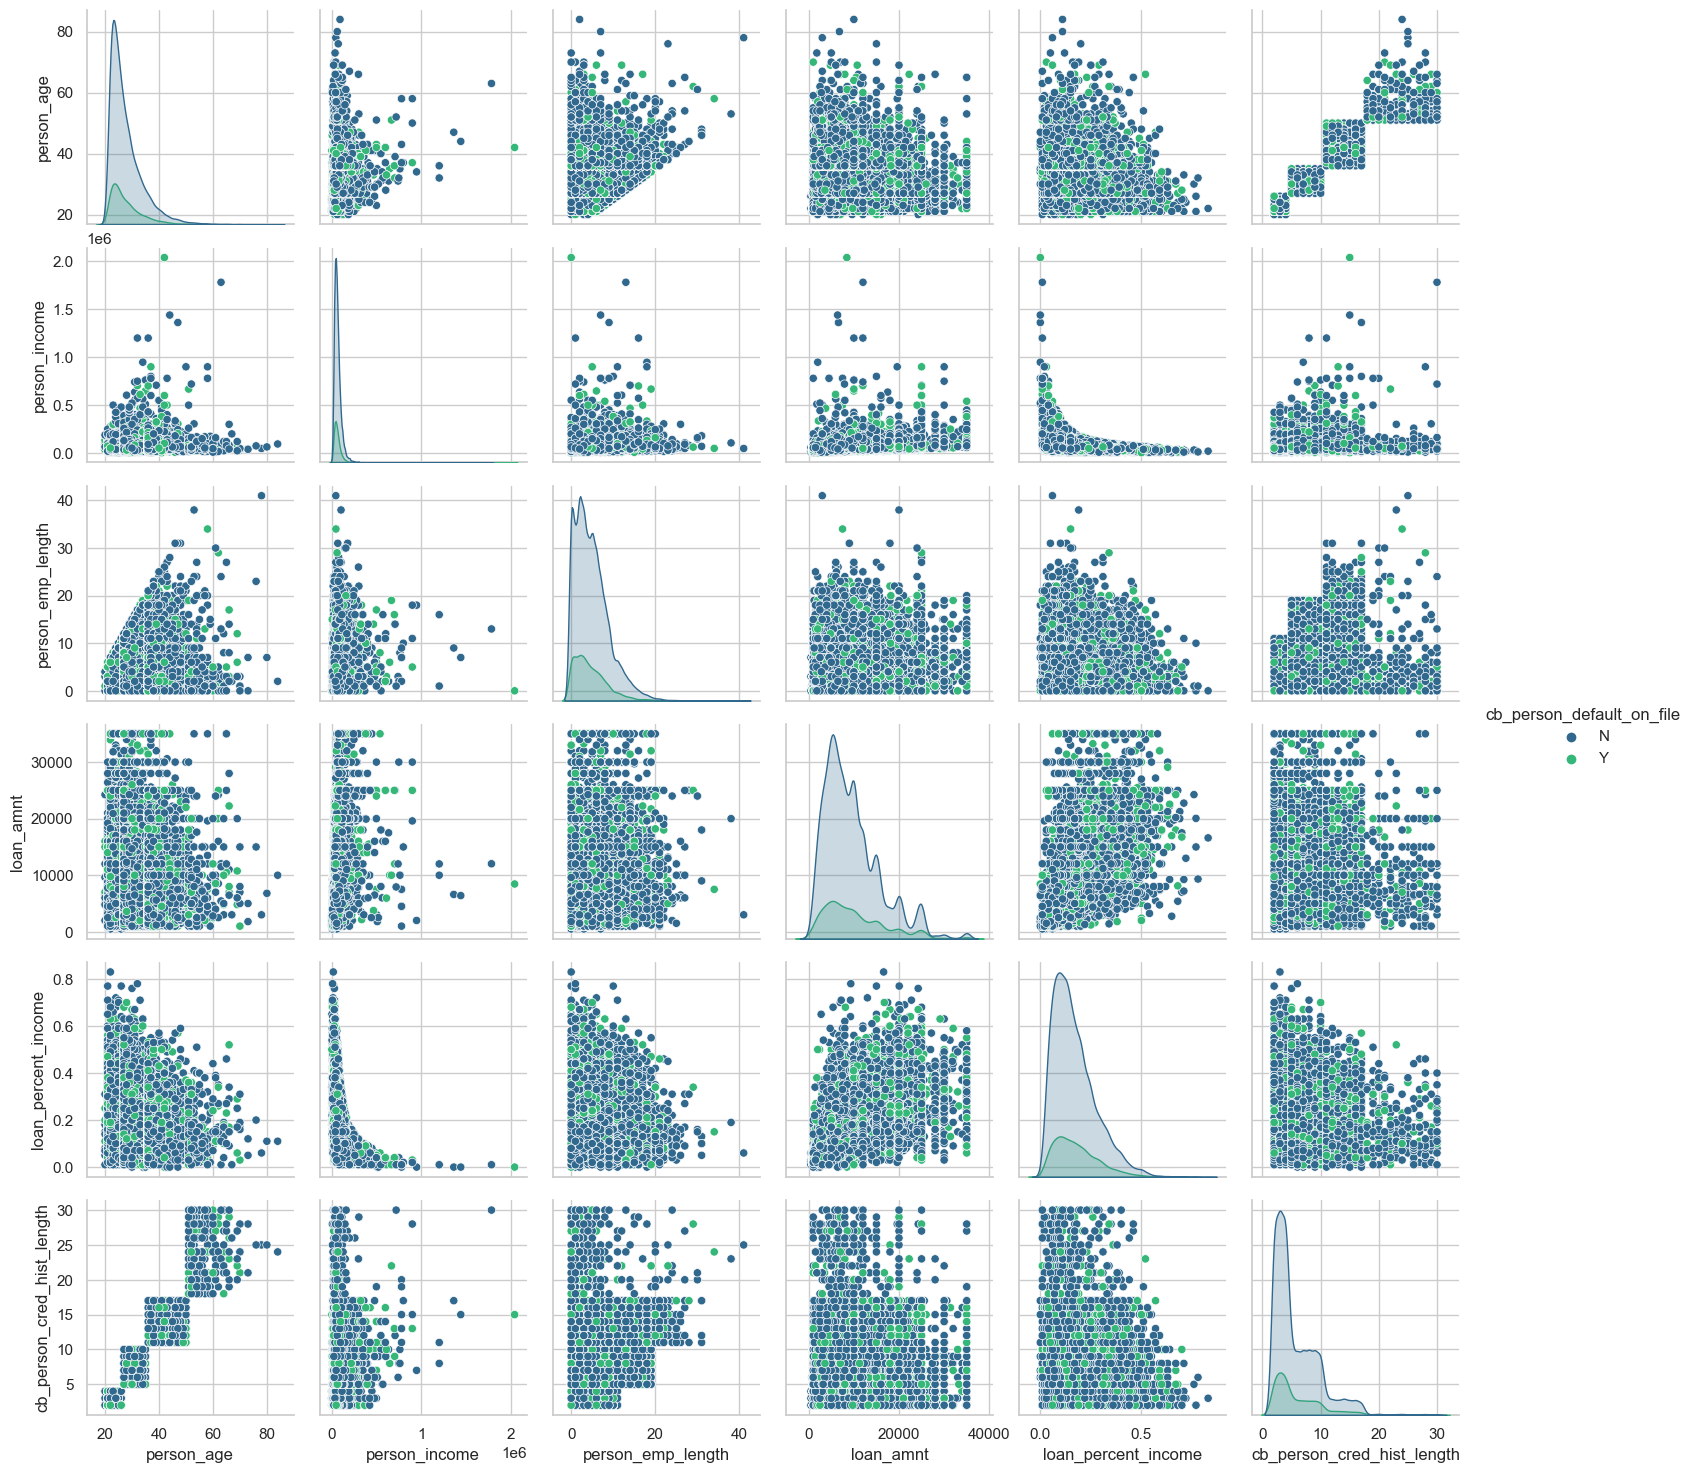

In [22]:
# Sélectionner les colonnes continues à tracer, excluant 'loan_int_rate'
col_cont_minus_loan_int_rate = [col for col in col_cont if col != 'loan_int_rate']

# Ajouter la variable discrète 'cb_person_default_on_file' à la liste des colonnes à tracer
to_plot = col_cont_minus_loan_int_rate + ['cb_person_default_on_file']

# Créer le pairplot
sns.pairplot(df[to_plot], hue='cb_person_default_on_file', palette=('viridis'))

# Afficher le plot
plt.show()

**Créer la matrice de corrélation**

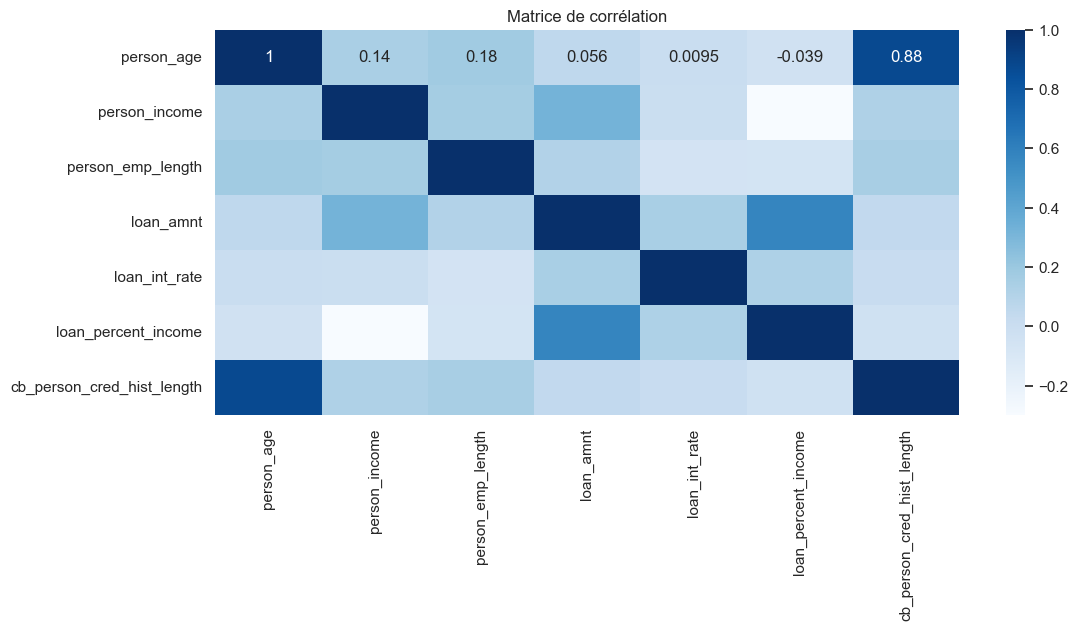

In [23]:
# Sélectionner uniquement les colonnes numériques pour la matrice de corrélation
numerical_df = df[col_cont]

# Calculer la matrice de corrélation
correlation_matrix = numerical_df.corr()

# Créer la heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Matrice de corrélation')
plt.show()

Nous avons créé un pairplot en analysant les variables continues les reliant à un discret variables, nous pouvons voir qu'il y a des valeurs aberrantes, en années, en revenu et en personne.
Nous devrons refaire le nettoyage des données, quant à la corrélation que nous avons peut voir qu'il n'y a pas de présence de multicolinéarité.

<h1 style="color:green">3. Data Preprocessing</h1>

Dans cette section, nous allons mettre à l'échelle des données (scaling data) pour de meilleures performances données, nous obtiendrons également les variables nominales pour les variables catégorielles.

In [24]:
# Obtenir les variables catégorielles
le = LabelEncoder()

# Transformer person_home_ownership
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])

# Transformer loan_intent
df['loan_intent'] = le.fit_transform(df['loan_intent'])

# Transformer cb_person_default_life
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'])

In [25]:
dt = df.copy()

- Tout d'abord, nous divions les variables dépendantes et indépendantes.
- Les variables binaires ne sont pas mise à l'échelle.
- La variable cible n'est pas mise à l'échelle car elle est binaire.

In [26]:
dumi = dt['cb_person_default_on_file'].values
y = dt['loan_status'] #binary dependient
x = dt.drop(['cb_person_default_on_file','loan_status'], axis =1)

In [27]:
# Scalling data

# créer une copie 
x = x.copy()

# modele
scaler = StandardScaler()

# entraîner modèle
scaler.fit(x)

# join dummi with x variables
x_scaler = pd.DataFrame(scaler.transform(x), columns=x.columns)

In [28]:
# join dummi with x variables
x_scaler['cb_person_default_on_file'] = dumi

In [29]:
x_scaler.head()

person_age  person_income  person_home_ownership  person_emp_length  \
0   -1.088462      -1.103229               0.221743           0.054050   
1   -0.440908      -1.103229              -1.172470          -0.936567   
2   -0.764685      -0.018063               0.918850          -0.193604   
3   -0.602797      -0.233543               0.918850           0.797013   
4   -1.088462      -1.097406               0.221743          -0.688913   

   loan_intent  loan_amnt  loan_int_rate  loan_percent_income  \
0    -0.885060  -1.368191       0.029337            -0.653501   
1     0.271360  -0.657021       0.564820             3.764748   
2     0.271360   4.005094       1.295305             3.388727   
3     0.271360   4.005094       0.998158             3.576737   
4     1.427781  -1.131134      -1.208773             0.756578   

   cb_person_cred_hist_length  cb_person_default_on_file  
0                   -0.940503                          0  
1                   -0.693022                          0  
2                   -0.940503                          0  
3                   -0.445542                          1  
4                   -0.940503                          0

In [30]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: loan_status, dtype: int64

<h1 style="color:green">4. PCA - Analyse en composantes principales</h1>

L'analyse en composantes principales (Principal Component Analysis) est une méthode de famille de l'analyse des données qui consiste à transformer des variables liées entre elles (dites "corrélées" en statistique) en nouvelles variables décorrélées les unes des autres. Ces nouvelles variables sont nommées "composantes principales" ou axes principaux. Elle permet de résumer l'information en réduisant le nombre de variables.

Les données ont été mises à l'échelle (normalisées), ce qui est essentiel avant d'appliquer la PCA pour garantir que toutes les variables contribuent de manière égale à l'analyse.

In [31]:
# Modèle
pca = PCA()

# Entraîner modèle, les données normalisées x_scaler ont été ajustées
pca.fit(x_scaler)

# Les données normalisées ont été transformées en utilisant le modèle PCA, ce qui a produit un nouveau jeu de variables (les composantes principales)
x_scaler_pca = pca.transform(x_scaler)

In [32]:
# Convertir DataFrame
x_scaler_pca = pd.DataFrame(x_scaler_pca)

In [33]:
# Analyser la variance de x_scaler_pca
var = pca.explained_variance_ratio_

# Afficher la variance de toutes les caractéristiques
print(len(var))
print(var)

10
[0.22532263 0.1796727  0.15939205 0.11234702 0.10877222 0.09314089
 0.07688521 0.01965445 0.01331108 0.01150174]


- La première composante principale explique environ 22.53% de la variance totale des données.
- La deuxième composante principale explique environ 17.97% de la variance totale.
- La troisième composante principale explique environ 15.94% de la variance totale.
- La quatrième composante principale explique environ 11.23% de la variance totale.
- Et ainsi de suite.

Analyser la variance cumulative expliquée par chaque composante principale après avoir appliqué la PCA

=> Cela nous aide à déterminer combien de composantes principales sont nécessaires pour expliquer une quantité significative de la variances totales des données



1 composante: 22.53%
2 composante: 40.50%
3 composante: 56.44%
4 composante: 67.67%
5 composante: 78.55%
6 composante: 87.86%
7 composante: 95.55%
8 composante: 97.52%
9 composante: 98.85%
10 composante: 100.00%


C:\Users\33766\AppData\Local\Temp\ipykernel_24484\2551374732.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r-x" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(cum_var, 'r-x', marker='X')


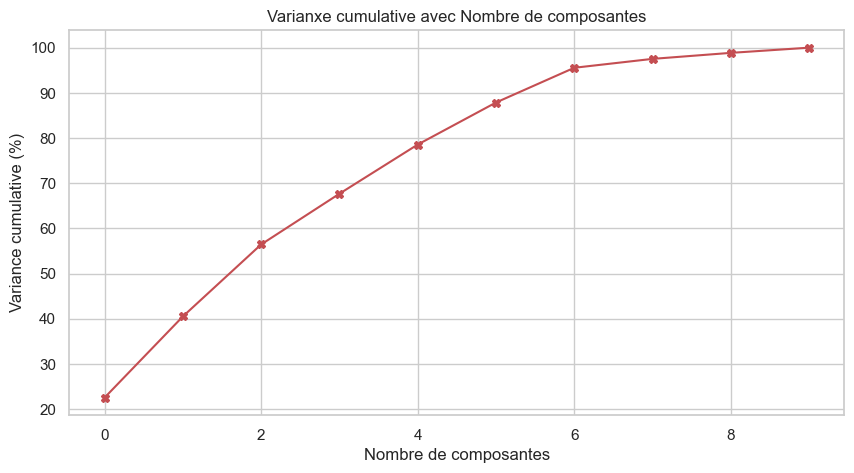

In [34]:
# Calculer la variance cumulative
# np.cumsum() calcule la somme cumulative des pourcentages de variance, retourne un tableau où chaque élément est la somme des éléments précédents du tab d'entrée
cum_var = np.cumsum(np.round(var, decimals=4) * 100)

# Afficher le résultat
for i, acumulado in enumerate(cum_var, start=1):
    print(f"{i} composante: {acumulado:.2f}%")
    
# Tracer la variance cumulative
plt.figure(figsize=(10,5))
plt.plot(cum_var, 'r-x', marker='X')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulative (%)')
plt.title('Varianxe cumulative avec Nombre de composantes')
plt.grid(True)
plt.show()

- La première composante principale explique <strong>22.53%</strong> de la variance totale des données. C'est la composante la plus informative.
- La deuxième composante ajoute une explication de <strong>17.97%</strong> de la variance, portant le total à <strong>40.50%</strong>.
- La troisième composante ajoute <strong>15.94%</strong> de variance expliquée, portant le total à <strong>56.44%</strong>.
- La quatrième composante ajoutes <strong>11.23%</strong>, portant le total à <strong>67.67%</strong>.
- La cinquième composante ajoute <strong>10.88%</strong>, portant le total à <strong>78.55%</strong>.
- La sixième composante ajoute <strong>9.31%</strong>, portant le total à <strong>87.86%</strong>.
- La septième composante ajoute <strong>7.69%</strong>, portant le total à <strong>95.55%</strong>.
- La huitième composante ajoute <strong>1.97%</strong>, portant le total à <strong>97.52%</strong>.
- La neuvième composante ajoute <strong>1.33%</strong>, portant le total à <strong>98.85%</strong>.
- La dixième composante ajoute <strong>1.15%</strong>, portant le total à <strong>100%</strong>.

**Diminishing Returns**
- Les premières composantes principales expliquent une proposition substantielle de la variance. Les trois premières composantes expliquent déjà plus de <strong>50%</strong> de la variance totale.
- Au fur et à mesure que de nouvelles composantes sont ajoutées, la proportion de variance supplémentaire expliquée par chaque nouvelle composante diminue. Par exemple, la première composante explique <strong>22.53%</strong>, tandis que la dixième ne contribue que <strong>1.15%</strong>.

**Cumulative Variance**
- Après la 6ème composante, <strong>87.86%</strong> de la variance totale est appliquée, ce qui est généralement considéré comme un très bon résultat.
- A partir de la 7ème composante, la variance supplémentaire expliquée devient relativement faible, ce qui suggère que ces composantes ajoutent peu d'information supplémentaire.

**Point de Coude**
- Un point de coude pourrait être identifié autour de la 6ème composante, où la courbe de variance cumulative commence à se stabiliser.
- Dans une analyse pratique, on pourrait décider de conserver les 6 premières composantes principales, car elles expliquent ensemble environ <strong>88%</strong> de la variance totale, ce qui est suffisant pour de nombreuses applications sans sacrifier trop d'information.

In [35]:
x_scaler_pca.head(10)

0         1         2         3         4         5         6  \
0 -1.805493 -1.266667 -0.282448  0.067289 -0.792153 -0.909012 -0.023975   
1 -1.507392  2.261036 -0.419234 -1.415139 -0.111024 -0.345584 -1.965049   
2 -0.949499  5.374103  0.899183 -0.167407  0.348316  0.400812  0.619997   
3 -0.335852  5.446190  0.864788 -0.637231  0.241536 -0.337408  0.960281   
4 -1.988344 -0.527045 -0.492026 -1.737870  1.043190  0.385971 -0.203659   
5 -0.101054  4.543136  1.318230 -0.378362 -0.888339  0.158026  1.380069   
6 -0.297192  4.371189  1.129599 -0.745090  0.158597  0.966197  1.106555   
7 -0.286560  3.982316  1.657683 -1.446815  0.631000  0.769558  1.670854   
8 -1.533568 -0.471666 -0.604930 -0.008988  1.585795 -1.455337 -0.303482   
9 -0.301002  4.083339  1.362516 -1.113156  1.282501  0.980215  1.305220   

          7         8         9  
0 -0.037673 -0.107965  0.193866  
1  2.322493  0.283426  0.377926  
2 -0.486786  0.085564  0.359489  
3 -0.404442 -0.099613 -0.692024  
4  0.633875 -0.056493 -0.059745  
5 -0.858064  0.229203  0.176151  
6 -0.916645 -0.160587  0.064674  
7 -1.005631  0.176267 -0.063670  
8  0.291213 -0.285500  0.426155  
9 -1.029347 -0.399004 -0.000691

In [36]:
# Supprimer les composantes ne fournissent aucune information
x_scaler_pca.drop([7,8,9], axis=1, inplace=True)

In [37]:
x_scaler_pca.head()

0         1         2         3         4         5         6
0 -1.805493 -1.266667 -0.282448  0.067289 -0.792153 -0.909012 -0.023975
1 -1.507392  2.261036 -0.419234 -1.415139 -0.111024 -0.345584 -1.965049
2 -0.949499  5.374103  0.899183 -0.167407  0.348316  0.400812  0.619997
3 -0.335852  5.446190  0.864788 -0.637231  0.241536 -0.337408  0.960281
4 -1.988344 -0.527045 -0.492026 -1.737870  1.043190  0.385971 -0.203659

<h1 style="color:green">5. Entraînement modèle - Logistic Regression</h1>

In [38]:
# Séparer les données en Train et Test
x_train, x_test, y_train, y_test = train_test_split(x_scaler_pca, y, test_size=0.2)

In [39]:
df['loan_status'].value_counts()

loan_status
0    22308
1     6187
Name: count, dtype: int64

In [40]:
# Equilibre des données dans loan_status (Sur-échantillonnage)
smote = SMOTE(sampling_strategy='minority', k_neighbors=6)
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)

In [41]:
print(len(x_train_sm))
print(len(y_train_sm))

35652
35652


In [42]:
# Equilibre des données dans loan_status (Sous-échantillonnage)
rus = RandomUnderSampler(sampling_strategy='majority')
x_train_us, y_train_us = rus.fit_resample(x_train, y_train)

In [43]:
print(len(x_train_us))
print(len(y_train_us))

9940
9940


**Logistic Model**

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compiler modèle 
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

# train model
model.fit(
    x_train_sm,
    y_train_sm,
    epochs = 100,
    batch_size = 32,
    verbose = 0
)

**Evaluer le modèle avec test set (x_test, y_test)**

In [45]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Model accuracy : {accuracy*100:.2f}%')
print(f'Average error commited by the model: {loss:.3f}')

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7543 - loss: 0.4972
Model accuracy : 74.77%
Average error commited by the model: 0.501


In [46]:
# Predire avec x_train pour comparer résultats avec y_train
y_pred_train = model.predict(x_train_sm)

1115/1115 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step


In [47]:
# y_train_sm original
y_train_sm_original = np.array(y_train_sm)

La courbe ROC (Receiver Operating Characteristic) est un outil graphique utilisé pour évaluer la performance d'un modèle de classification binaire. Elle trace la relation entre le taux de vrais positifs (True Positive Rate, TPR) et le taux de faux positifs (False Positive Rate, FPR) à différents seuils de classification. Voici une explication plus détaillée :

- Courbe ROC : Cette courbe est construite à partir des prédictions du modèle et des données réelles d'entraînement. Elle permet de visualiser la capacité du modèle à distinguer entre les classes positives et négatives.

- TPR (True Positive Rate) : Aussi appelé sensibilité ou rappel (Recall), il mesure la proportion de cas positifs correctement identifiés par le modèle. En d'autres termes, c'est la fraction des vrais positifs parmi tous les cas réellement positifs.

**TPR = Vrais Positifs (TP) / (Vrais Positifs (TP) + Faux Négatifs (FN))**

- FPR (False Positive Rate) : Il mesure la proportion de cas négatifs incorrectement identifiés comme positifs par le modèle. C'est la fraction des faux positifs parmi tous les cas réellement négatifs.
 
**FPR = Faux Positifs (FP) / (Faux Positifs (FP) + Vrais Négatifs (TN)**

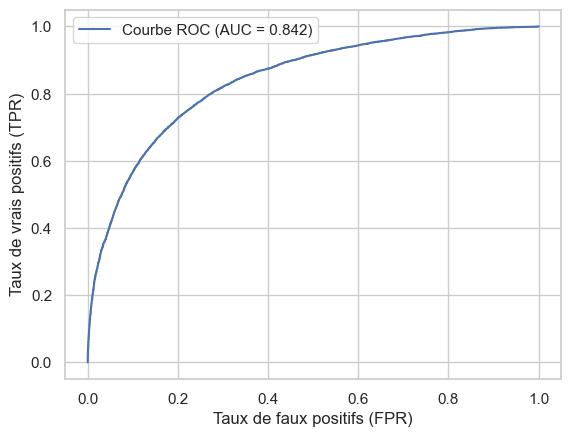

Un AUC de 0.5 indique que le modèle n'est pas meilleur qu'un choix aléatoire pour distinguer les classes.
Un AUC de 1 indique que le modèle est parfait pour distinguer les classes.


In [48]:
# Courbe ROC (Receiver Operating Characteristic)

# Calculer les taux de faux positifs et les taux de vrais positifs nécessaires pour tracer la courbe ROC
fpr, tpr, _ = roc_curve(y_train_sm_original, y_pred_train)

# Calculer la surface sous la courbe ROC (AUC)
# L'AUC est une mesure de la qualité de la classification
auc_score = auc(fpr, tpr)

# Tracer la courbe
plt.plot(fpr, tpr, label='Courbe ROC (AUC = {:.3f})'.format(auc_score))
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.show()

# Afficher les résultats
print('Un AUC de 0.5 indique que le modèle n\'est pas meilleur qu\'un choix aléatoire pour distinguer les classes.')
print('Un AUC de 1 indique que le modèle est parfait pour distinguer les classes.')


Avec un AUC (Area Under the Curve) de 0.84, cela indique une performance solide du modèle pour distinguer entre les classes positives et négatives. 

In [49]:
# Créer la matrice de confusion
confusion_matrix = confusion_matrix(y_train_sm, y_pred_train > 0.5)

# Afficher la matrice de confusion
print(confusion_matrix)

[[13365  4461]
 [ 3969 13857]]


print('_______________________________________________________________________________)
print('13,292: Cases that the model predicted as positive and are actually positive_TP)
print('4,560: Cases that the model predicted as positive but are actually negative _TN)
print('3,958: Cases that the model predicted as negative but are actually positive _FP)
print('13,894: Cases that the model predicted as negative and are actually negative_FN)
print('_______________________________________________________________________________)

In [50]:
y_pred_binario = model.predict(x_test) > 0.5

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [51]:
f1 = f1_score(y_test, y_pred_binario, average='binary')
print(f"F1-score: {f1}")

F1-score: 0.5679086538461539


Avec une F1-score de 0.586, cela indique que le modèle a une performance moyenne en termes de précision et de rappel pour la classe positive.

- La F1-score est une mesure de la précision globale du modèle, prenant en compte à la fois la précision (capacité du modèle à identifier correctement les exemples positifs) et le rappel (capacité du modèle à capturer tous les exemples positifs).

- Une F1-score proche de 1 indique une précision et un rappel élevés, ce qui signifie que le modèle a une bonne capacité à identifier correctement les exemples positifs tout en minimisant les faux positifs et les faux négatifs.

- Une F1-score proche de 0 indique une faible précision et/ou un faible rappel, ce qui signifie que le modèle a du mal à identifier correctement les exemples positifs et/ou qu'il génère beaucoup de faux positifs et/ou de faux négatifs.
